<a href="https://colab.research.google.com/github/pollcrater/Machine-Learning-Assignments/blob/main/Restaurant_Reviews_using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP analysis of Restaurant reviews:



**Natural language processing (NLP)** is an area of computer science and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data. It is the branch of machine learning which is about analyzing any text and handling predictive analysis.









# **Step 1:** Import dataset

In [1]:
import pandas as pd  #Import libraries
!wget https://cdncontribute.geeksforgeeks.org/wp-content/uploads/Restaurant_Reviews.tsv
dataset = pd.read_csv("Restaurant_Reviews.tsv", delimiter = "\t" , quoting = 3)  #Import the dataset

--2022-08-04 10:24:43--  https://cdncontribute.geeksforgeeks.org/wp-content/uploads/Restaurant_Reviews.tsv
Resolving cdncontribute.geeksforgeeks.org (cdncontribute.geeksforgeeks.org)... 108.157.172.33, 108.157.172.227, 108.157.172.12, ...
Connecting to cdncontribute.geeksforgeeks.org (cdncontribute.geeksforgeeks.org)|108.157.172.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61332 (60K) [text/tab-separated-values]
Saving to: ‘Restaurant_Reviews.tsv’

Restaurant_Reviews. 100%[===================>]  59.89K  --.-KB/s    in 0.02s   

2022-08-04 10:24:43 (2.64 MB/s) - ‘Restaurant_Reviews.tsv’ saved [61332/61332]



In [2]:
dataset


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


# Step 2: Text Cleaning or Preprocessing
 

*   **Remove Punctuations, Numbers** :  Punctuations, Numbers doesn’t help much in processong the given text, if included, they will just increase the size of bag of words that we will create in the last step and decrease the efficency of algorithm.
*   **Stemming** : Take roots of the word
    example:

      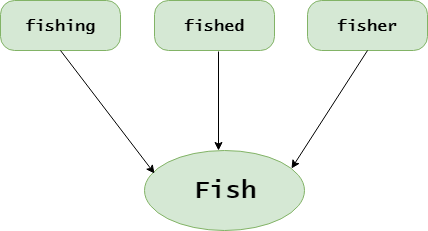

*   **Convert each word into its lower case** : For example, it is useless to have same words in different cases (eg ‘good’ and ‘GOOD’).


In [3]:
import re   # library to clean data  re(regular expressions)
import nltk  # Natural Language Tool Kit 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
from nltk.corpus import stopwords                 # to remove stopword 
from nltk.stem.porter import PorterStemmer        # for Stemming propose  
corpus = []                                       # Initialize empty array to append clean text 
for i in range(0,1000):                           # 1000 (reviews) rows to clean
    review  = re.sub(pattern = '[^a-zA-Z]',repl = ' ', string = dataset['Review'][i])  # column : "Review", row ith. re.sub() this replaces the part of the string where the pattern is found with repl.
    
    review = review.lower()                       # convert all cases to lower cases
   
    review = review.split()                       # split to array(default delimiter is " ")
    #print(review)
    
    ps = PorterStemmer()                          # creating PorterStemmer object to take main stem of each word 
    
    all_stopwords = stopwords.words('english')      # stopwords don't add meaning to sentance. 
    #print(type(all_stopwords))
    all_stopwords.remove('not')                       
    #print(all_stopwords) 

    # we are trying to modify review which doesn't contain stopwords except "not". beause we don't need them.
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]  # loop for stemming each word in string array at ith row which is not present in all_stopwords
    
    review = ' '.join(review)                     # rejoin all string array elements to create back into a string 
    #print(review)
    corpus.append(review)                         # append each string to create array of clean text
    #print(corpus)

**Note**:

*   ^[a-zA-Z] means any a-z or A-Z at the start of a line or means all strings that start with a letter.

*   [^a-zA-Z] means any character that IS NOT a-z OR A-Z or  all strings that contain a non-letter.

The caret ("^") is used in two different ways, one to signal the start of the text, one to negate a character match inside square brackets.

# Step 3: Tokenization, involves splitting sentences and words from the body of the text.

# Step 4: Making the bag of words via sparse matrix

*   Take all the different words of reviews in the dataset without repeating of words.
*   One column for each word, therefore there are going to be many columns.
*   Rows are reviews
*   If word is there in row of dataset of reviews, then the count of word will be there in row of bag of words under the column of the word.
Examples: Let’s take a dataset of reviews of only two reviews

     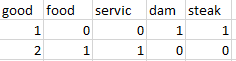

For this purpose we need *CountVectorizer* class from **sklearn.feature_extraction.text**.
We can also set max number of features (max no. features which help the most via attribute “max_features”). Do the training on corpus and then apply the same transformation to the corpus “.fit_transform(corpus)” and then convert it into array. If review is positive or negative that answer is in second column of : dataset[:, 1] : all rows ans 1st column (indexing from zero).

In [5]:
from sklearn.feature_extraction.text import CountVectorizer  # Creating the Bag of Words model 
 
cv = CountVectorizer(max_features = 1400)                    # "max_features" is attribute to experiment with to get better results 
  
X = cv.fit_transform(corpus).toarray()                       # X contains corpus (dependent variable) 
  
y = dataset.iloc[:, 1].values                                # y contains answers if review is positive or negative 

**Description of the dataset to be used:**


*   Columns seperated by (tab space)
*   First column is about reviews of people
In second column, 0 is for negative review and 1 is for positive 

In [6]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Step 5 : Splitting Corpus into Training and Test set.

 For this we need class train_test_split from sklearn.cross_validation. Split can be made 70/30 or 80/20 or 85/15 or 75/25, here I choose 75/25 via “test_size”.
X is the bag of words, y is 0 or 1 (positive or negative).

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,shuffle=True,random_state=123)  
# Splitting the dataset into  the Training set and Test set. experiment with "test_size"  to get better results 

In [44]:
X_train_1 =X_train
X_test_1 = X_test
y_train_1 = y_train
y_test_1 = y_test

# Step 6: Fitting a Predictive Model 
Here, we are creating a models list with a model name , the model itself. We have Random Forest ,
Logistic regression , Support Vector Machine, Naive bayes.These Machine Learning
approaches will be used.
**** 
**note** :
In Random Forest Classifier: 
n_estimators can be said as number of  trees, experiment with n_estimators  to get better results  


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier    

In [46]:
models = [("Random Forest",RandomForestClassifier(n_estimators = 501,criterion = 'entropy')),("Logistic Regression", LogisticRegression()), ("Support Vector Machine", SVC()), ("Naive Bayes Classifier", GaussianNB())]

In [47]:
score_dic={}
for name, model in models:
    classifier_model = model
    classifier_model.fit(X_train,y_train)

    y_predicted = classifier_model.predict(X_test)
    # print("Results with %s" % name)
    # print("Accuracy Score: %s" % (metrics.accuracy_score(y_test,y_predicted)))
    score_dic[model] =  metrics.accuracy_score(y_test,y_predicted)
print(score_dic)

{RandomForestClassifier(criterion='entropy', n_estimators=501): 0.78, LogisticRegression(): 0.835, SVC(): 0.825, GaussianNB(): 0.675}


In [48]:
best_accuracy,best_model = max(zip(score_dic.values(),score_dic.keys()))
best_model

LogisticRegression()

# Step 7: Pridicting Final Results via using .predict() method with attribute X_test



In [49]:
# Predicting the Test set results 
y_pred = best_model.predict(X_test) 
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1])

**Note:** Accuracy with random forest was 80%.(It may be different when performed experiment with different test size, here ***test_size = 0.25***).

# Step 8: To know the accuracy, confusion matrix is needed.

Confusion Matrix is a 2X2 Matrix.

*   **TRUE POSITIVE :** measures the proportion of actual positives that are correctly identified.
*   **TRUE NEGATIVE :** measures the proportion of actual positives that are not correctly identified.
*   **FALSE POSITIVE :** measures the proportion of actual negatives that are correctly identified.
*   **FALSE NEGATIVE :** measures the proportion of actual negatives that are not correctly identified.


 **Note** :  True or False refers to the assigned classification being Correct or Incorrect, while Positive or Negative refers to assignment to the Positive or the Negative Category

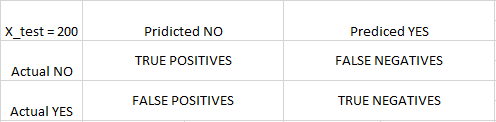

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score   # Making the Confusion Matrix 
cm = confusion_matrix(y_test, y_pred) 
cm 

array([[75, 20],
       [13, 92]])

In [52]:
accuracy_score(y_test, y_pred)

0.835

# Using Pipelines:
**From step 6**

Method 3 :(Logistic regression)

In [53]:
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[('estimator', LogisticRegression())])

pipe.fit(X_train, y_train)

Pipeline(steps=[('estimator', LogisticRegression())])

In [54]:
y_pred = pipe.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1])

In [55]:
pipe.score(X_test, y_test)

0.835